## Problem Statement:

### UNEMPLOYMENT ANALYSIS WITH PYTHON (Linear Regression)

Unemployment is measured by the unemployment rate which is the number of people
who are unemployed as a percentage of the total labour force. We have seen a sharp
increase in the unemployment rate during Covid-19, so analyzing the unemployment rate
can be a good data science prct.oje


In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import warnings

warnings.filterwarnings("ignore")

## 1. Data Collection

In [125]:
# load data
df = pd.read_csv('Unemployment in india.csv')

# view sample data
df.head(60)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
5,Andhra Pradesh,31-10-2019,Monthly,3.52,12017412.0,43.01,Rural
6,Andhra Pradesh,30-11-2019,Monthly,4.12,11397681.0,41.00,Rural
7,Andhra Pradesh,31-12-2019,Monthly,4.38,12528395.0,45.14,Rural
8,Andhra Pradesh,31-01-2020,Monthly,4.84,12016676.0,43.46,Rural
9,Andhra Pradesh,29-02-2020,Monthly,5.91,11723617.0,42.83,Rural


In [126]:
# read another data set
df2 = pd.read_csv('Unemployment_Rate_upto_11_2020.csv')

# view sample 
df2.head(60)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.7400
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.7400
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.7400
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.7400
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.7400
5,Andhra Pradesh,30-06-2020,M,3.31,19805400,47.41,South,15.9129,79.7400
6,Andhra Pradesh,31-07-2020,M,8.34,15431615,38.91,South,15.9129,79.7400
7,Andhra Pradesh,31-08-2020,M,6.96,15251776,37.83,South,15.9129,79.7400
8,Andhra Pradesh,30-09-2020,M,6.40,15220312,37.47,South,15.9129,79.7400
9,Andhra Pradesh,31-10-2020,M,6.59,15157557,37.34,South,15.9129,79.7400


In [127]:
df.shape

(768, 7)

In [128]:
df2.shape

(267, 9)

## 2. Data cleaning and Exploration

In [129]:
# null value check up
df.isnull()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
763,True,True,True,True,True,True,True
764,True,True,True,True,True,True,True
765,True,True,True,True,True,True,True
766,True,True,True,True,True,True,True


In [130]:
# check for null values
df.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [131]:
# drop those null values
df = df.dropna()

In [132]:
# new shape
df.shape # totally 28 rows are removed

(740, 7)

In [133]:
df.isnull().sum()  # now it is valid

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

In [134]:
# same way check for df2
df2.isnull()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
262,False,False,False,False,False,False,False,False,False
263,False,False,False,False,False,False,False,False,False
264,False,False,False,False,False,False,False,False,False
265,False,False,False,False,False,False,False,False,False


In [135]:
df2.isnull().sum() # this dataset is ok

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [136]:
df2.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

In [137]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [138]:
# drop unnecessary cols for our model
df2 = df2.drop(columns = [' Frequency', 'Region.1', 'longitude', 'latitude'])

# review it once
df2.head()

,Region,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
0,Andhra Pradesh,31-01-2020,5.48,16635535,41.02
1,Andhra Pradesh,29-02-2020,5.83,16545652,40.90
2,Andhra Pradesh,31-03-2020,5.79,15881197,39.18
3,Andhra Pradesh,30-04-2020,20.51,11336911,33.10
4,Andhra Pradesh,31-05-2020,17.43,12988845,36.46


In [139]:
# same way drop unwanted in df
df = df.drop(columns = ['Area', ' Frequency'])

# review now
df.head()

,Region,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
0,Andhra Pradesh,31-05-2019,3.65,11999139.0,43.24
1,Andhra Pradesh,30-06-2019,3.05,11755881.0,42.05
2,Andhra Pradesh,31-07-2019,3.75,12086707.0,43.50
3,Andhra Pradesh,31-08-2019,3.32,12285693.0,43.97
4,Andhra Pradesh,30-09-2019,5.17,12256762.0,44.68


In [140]:
# few cols are not in valid format or included with spaces around which make confusions and erros, so fix them
df = df.rename(columns = {' Date': 'Date', ' Estimated Unemployment Rate (%)': 'Estimated Unemployment Rate (%)',
                ' Estimated Employed': 'Estimated Employed', ' Estimated Labour Participation Rate (%)': 'Estimated Labour Participation Rate (%)',
               })

df.columns

Index(['Region', 'Date', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)'],
      dtype='object')

In [141]:
# same as in df2
df2 = df2.rename(columns = {' Date': 'Date', ' Estimated Unemployment Rate (%)': 'Estimated Unemployment Rate (%)',
                ' Estimated Employed': 'Estimated Employed', ' Estimated Labour Participation Rate (%)': 'Estimated Labour Participation Rate (%)',
               })

df2.columns

Index(['Region', 'Date', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)'],
      dtype='object')

### 2.1 Merge two datasets to make clear analysis and prediction

In [142]:
# concate the dataframe along rows
df = pd.concat([df, df2], ignore_index = True)

# final data frame that combined all data
df.head(60)

,Region,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
0,Andhra Pradesh,31-05-2019,3.65,11999139.0,43.24
1,Andhra Pradesh,30-06-2019,3.05,11755881.0,42.05
2,Andhra Pradesh,31-07-2019,3.75,12086707.0,43.50
3,Andhra Pradesh,31-08-2019,3.32,12285693.0,43.97
4,Andhra Pradesh,30-09-2019,5.17,12256762.0,44.68
5,Andhra Pradesh,31-10-2019,3.52,12017412.0,43.01
6,Andhra Pradesh,30-11-2019,4.12,11397681.0,41.00
7,Andhra Pradesh,31-12-2019,4.38,12528395.0,45.14
8,Andhra Pradesh,31-01-2020,4.84,12016676.0,43.46
9,Andhra Pradesh,29-02-2020,5.91,11723617.0,42.83


In [143]:
# new shape 
df.shape

(1007, 5)

In [144]:
# change Date col type datetime type of pandas 
df['Date'] = pd.to_datetime(df['Date'])

df['Date'].dtype

dtype('<M8[ns]')

### 2.2 Data Exploration

In [145]:
# describe basic statistics of data
df.describe()

,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,1007,1007.000000,1.007000e+03,1007.000000
mean,2020-01-31 06:06:04.647467776,11.906991,8.996209e+06,42.378620
min,2019-05-31 00:00:00,0.000000,4.942000e+04,13.330000
25%,2019-09-30 00:00:00,4.685000,1.639125e+06,37.835000
50%,2020-01-31 00:00:00,8.890000,5.543380e+06,40.880000
75%,2020-05-31 00:00:00,16.125000,1.287115e+07,45.315000
max,2020-10-31 00:00:00,76.740000,5.943376e+07,72.570000
std,NaN,10.739549,1.020784e+07,8.048542


## 3. Data visualization and analysis

Lets target Andhra Pradesh and made all analysis things on it

In [146]:
# target one region I did AP my native
region = 'Andhra Pradesh' # you can replace with region that you want predict

#  Specially for AP
ap = df[df['Region'] == region]

# its like searching for a particular value among a column
ap

,Region,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
0,Andhra Pradesh,2019-05-31,3.65,11999139.0,43.24
1,Andhra Pradesh,2019-06-30,3.05,11755881.0,42.05
2,Andhra Pradesh,2019-07-31,3.75,12086707.0,43.50
3,Andhra Pradesh,2019-08-31,3.32,12285693.0,43.97
4,Andhra Pradesh,2019-09-30,5.17,12256762.0,44.68
5,Andhra Pradesh,2019-10-31,3.52,12017412.0,43.01
6,Andhra Pradesh,2019-11-30,4.12,11397681.0,41.00
7,Andhra Pradesh,2019-12-31,4.38,12528395.0,45.14
8,Andhra Pradesh,2020-01-31,4.84,12016676.0,43.46
9,Andhra Pradesh,2020-02-29,5.91,11723617.0,42.83


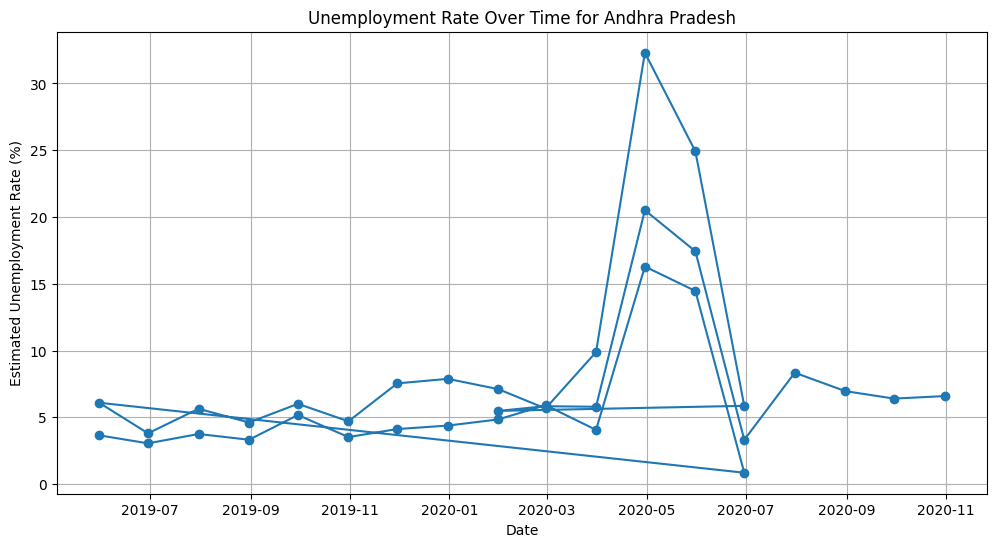

In [147]:
# Plot the unemployment rate over time for the Andhra Pradesh using matplotlib

plt.figure(figsize=(12, 6))
plt.plot(ap['Date'], ap['Estimated Unemployment Rate (%)'], marker = 'o')
plt.title('Unemployment Rate Over Time for Andhra Pradesh')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.grid(True)
plt.show()

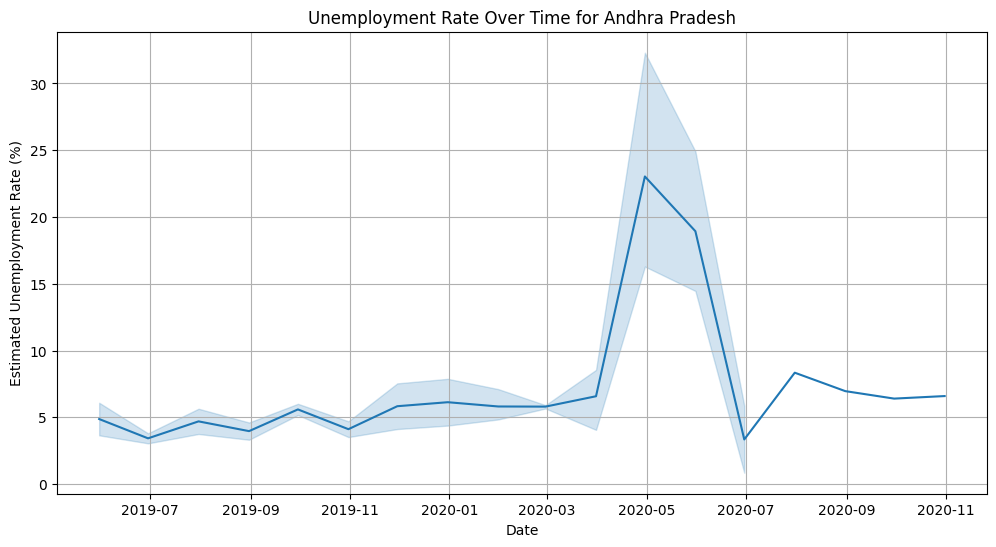

In [148]:
# Plot the unemployment rate over time for the Andhra Pradesh using Seaborn

plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Estimated Unemployment Rate (%)', data = ap)
plt.title('Unemployment Rate Over Time for Andhra Pradesh')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.grid(True)
plt.show()

## 4. Model Prediction

In [149]:
# Select features and target variable
X = df[['Estimated Employed', 'Estimated Labour Participation Rate (%)']] # features
y = df['Estimated Unemployment Rate (%)'] # target variable

### 4.1 train, test, split

In [115]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 4.2 Train Model

In [117]:
# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### 4.3 Predict and Evaluate Model

In [118]:
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))

Mean Squared Error: 93.42316568507398


## 5. Sample test cases Testing with our Model

In [119]:
# Sample input features for prediction
sample_input_1 = np.array([[25000, 60]])  # Sample input 1
sample_input_2 = np.array([[30000, 70]])  # Sample input 2

# Predict the unemployment rate for the sample inputs
prediction_1 = model.predict(sample_input_1)
prediction_2 = model.predict(sample_input_2)

# see the predictions
print("Prediction for Sample Input 1:", prediction_1[0])
print("Prediction for Sample Input 2:", prediction_2[0])

Prediction for Sample Input 1: 13.589492137912595
Prediction for Sample Input 2: 13.219188510693192


## 6. Conclusion: 

sample_input_1 represents a scenario with 25,000 estimated employed individuals and a 60% estimated labour participation rate.
sample_input_2 represents a scenario with 30,000 estimated employed individuals and a 70% estimated labuor participation rate

The predictions are the estimated unemployment rates for the given input scenarios based on the model's learned relationships between 'Estimated Employed', 'Estimated Labor Participation Rate (%)', and 'Estimated Unemployment Rate (%)' during the training phase.

These predictions are useful for understanding how changes in the number of employed individuals and labor participation rate might impact the unemployment rate, according to the model's learned patterns.
